In [1]:
%load_ext autoreload
%autoreload 2
import torch
import numpy as np
import pandas as pd
from omegaconf import OmegaConf
from pathlib import Path
from pprint import pprint
from torch.utils import data

# mycode
from ml_utilities.output_loader.result_loader import SweepResult, JobResult

from tflearning.learning_dynamics.covariance_analysis import GradCovarianceAnalyzer

# Gradient covariance analysis

I use this notebook to implement the gradient covariance analysis. 

In [2]:
# Load a job result to perform analysis on
spec = 'cf10-resnet'
path = '/system/user/beck/pwbeck/projects/regularization/tflearning/outputs/IA-A-cifar10-17.2.1-resnet-B--230120_134950'
jobr = JobResult(path)
jobr

JobResult(/system/user/publicwork/beck/projects/regularization/tflearning/outputs/IA-A-cifar10-17.2.1-resnet-B--230120_134950)

In [3]:
len(jobr.available_model_checkpoint_indices), #jobr.available_model_checkpoint_indices, 

(28,)

In [6]:
grad_analyzer = GradCovarianceAnalyzer(job=jobr, checkpoint_idxs=[], num_batches=[25], device='cuda:0', save_to_disk=True, batch_sizes=[128], save_folder_suffix='2')

Files already downloaded and verified


In [7]:
# stats, eigvals = grad_analyzer._covariance_analysis_for_batchsize_and_numbatches(batch_size=128, num_batch=15, dataloaders=grad_analyzer._create_dataloaders(128))

In [8]:
stats, eigvals = grad_analyzer.covariance_analysis()

cov analysis at checkpoint 64001: 100%|██████████| 28/28 [00:25<00:00,  1.09it/s]


In [9]:
stats

dataset                                    train                      \
spectral_statistic                    max_eigval min_non_zero_eigval   
batch_size num_batches checkpoint_idx                                  
128        25          0                0.155382            0.000719   
                       50               1.073768            0.012504   
                       100              0.686637            0.015608   
                       250              2.136121            0.025737   
                       500              1.296436            0.028753   
                       1000             2.568811            0.041025   
                       2000             1.708611            0.040732   
                       4000             0.528284            0.029120   
                       5000             1.040853            0.048320   
                       8000             1.453310            0.048457   
                       10000            1.347305            0.062505   
                       12000            0.470556            0.029270   
                       15000            0.565061            0.033348   
                       16000            0.646033            0.044080   
                       20000            1.246245            0.043436   
                       24000            0.508361            0.033574   
                       28000            0.569574            0.041891   
                       32000            0.499191            0.030538   
                       36000            0.158515            0.004038   
                       40000            0.156755            0.001059   
                       44000            0.156162            0.002269   
                       44500            0.143688            0.000420   
                       48000            0.227942            0.000719   
                       52000            0.126374            0.000897   
                       56000            0.126925            0.000506   
                       60000            0.141386            0.000524   
                       64000            0.155684            0.000435   
                       64001            0.143688            0.000420   

dataset                                                                    \
spectral_statistic                    inverse_condition_number      erank   
batch_size num_batches checkpoint_idx                                       
128        25          0                              0.004626   8.874350   
                       50                             0.011645   9.434126   
                       100                            0.022731  12.231400   
                       250                            0.012048   9.413007   
                       500                            0.022179  11.243946   
                       1000                           0.015970   9.868843   
                       2000                           0.023839  12.086455   
                       4000                           0.055121  15.570558   
                       5000                           0.046423  14.521061   
                       8000                           0.033343  13.647442   
                       10000                          0.046392  15.538687   
                       12000                          0.062203  17.385597   
                       15000                          0.059017  16.858055   
                       16000                          0.068231  17.542723   
                       20000                          0.034853  14.755312   
                       24000                          0.066044  17.419142   
                       28000                          0.073547  17.589060   
                       32000                          0.061176  17.442530   
                       36000                          0.025475  16.965919   
                       40000                          0.006757  16.044098

In [14]:
eigvals.style

In [20]:
import copy
# create datasets, set train transforms to val transforms if any
data_cfg = copy.deepcopy(jobr.config.config.data)
val_split_transforms = data_cfg.get('val_split_transforms', {})
data_cfg.train_split_transforms = val_split_transforms
data_cfg

{'dataset': 'cifar10', 'dataset_kwargs': {'data_root_path': '/system/user/beck/pwbeck/data'}, 'dataset_split': {'train_val_split': 0.9}, 'train_split_transforms': {}}

In [26]:
from ml_utilities.data.datasetgenerator import DatasetGenerator
from ml_utilities.data.data_utils import show_images

dataset_gen = DatasetGenerator(**data_cfg)
dataset_gen.generate_dataset()

Files already downloaded and verified


In [30]:
train_loader = data.DataLoader(dataset_gen.train_split, batch_size=10, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


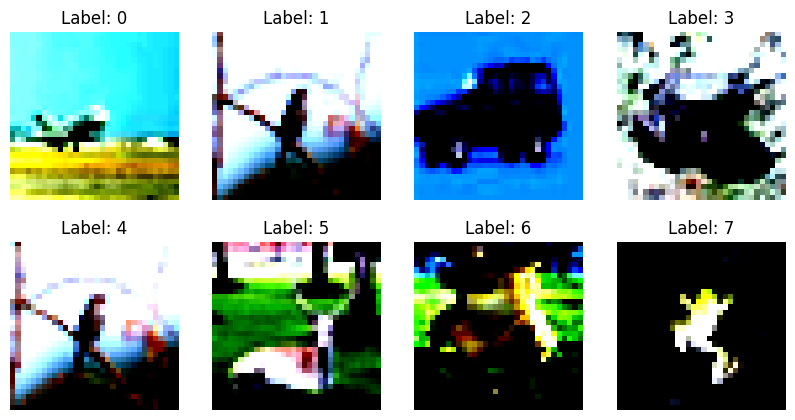

In [31]:
for i, (inputs, targets) in enumerate(train_loader):
    show_images(inputs, num_images=10, shuffle=False)
    break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


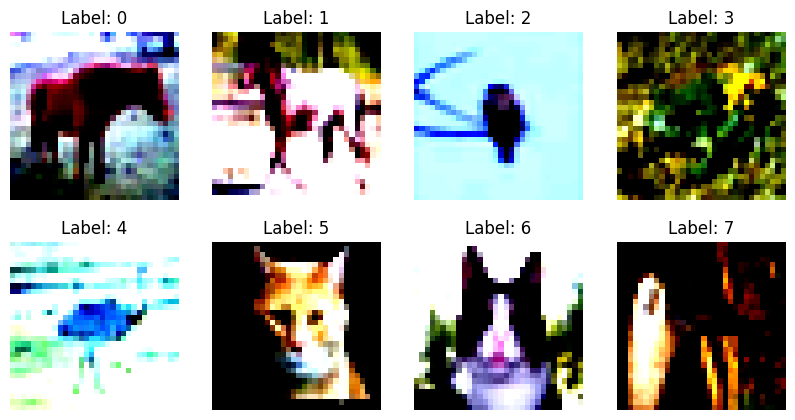

In [32]:
for i, (inputs, targets) in enumerate(train_loader):
    show_images(inputs, num_images=10, shuffle=False)
    break